In [1]:
import ipystata  
from ipystata.config import config_stata  
config_stata('C:\Program Files\StataCorp Stata 14.1 (Revision 20.06.2016)\StataSE-64.exe', force_batch=True)

IPyStata is loaded in batch mode.


In [10]:
%%stata   -o df 
display "Hello, I am printed in Stata."  
clear all
 import delimited C:\Users\Richard\Dropbox\projects\geotests\puntos201618.csv
 
* EFECTOS DE CAMBIO REGULACION UTILIZANDO PROXIMIDAD A LOS LIMITES DE LA CAPITAL 
* ESPECIFICACION POOL
* ESTRATEGIA DE IDENTIFICACION: SHARP RD

/* Treatment Var: */

gen treatment=state_name=="Capital Federal"

encode property_t, generate(property_t2)


* Dummys de area. Creadas para permitir más de una tendencia.
tabulate narea, gen(darea)  

gen year=substr(date,1,4)
gen month=substr(date,6,2)
gen datestring="1"+"/"+month+"/"+year
drop date
gen date=date(datestring,"DMY",2000)
format date %td


* para este ejemplo borro outliers
keep if price_per_m2<1500


***PRIMERO ME RESTRINJO AL PERIODO EXPOST, A LA ESTIMACION DE LA DISCONTINUIDAD

generate post=date>date("08/01/2017","MDY",2000)

*generate DD=post*treatment

* Dummys necesarias para el RD
* Distancias del lado capital definidas como negativas
* Distancias del lado provincia definidas como positivas

********************************
generate delta=-1*min_dist_to_lines if treatment
replace delta=min_dist_to_lines if treatment==0

gen DD=treatment*post


* IMPLEMENTACION ECONOMETRICA DEL RD
regress price_per_m2 delta treatment if min_dist_to_lines<0.01 & post

predict modelo1hat
sort delta 
twoway (scatter  price_per_m2 delta) (line modelo1hat delta if treatment==0) (line modelo1hat delta if treatment==1)  , legend(label(2 "Provincia") label(3 "Capital")) title("Rents: Mean of USD per m2") name("graph1")
capture graph export discont1.png, replace

* Permitiendo un efecto temporal antes y despues
regress price_per_m2 delta treatment post if min_dist_to_lines<0.01 
predict modelo2hat
twoway (scatter  price_per_m2 delta) (line modelo2hat delta if treatment==0 & post==0) (line modelo2hat delta if treatment==0 & post==1) (line modelo2hat delta if treatment==1 & post==0) (line modelo2hat delta if treatment==1 & post==1)  , legend(label(2 "Provincia Pre") label(3 "Provincia Post") label(4 "Capital pre") label(5 "Capital post")) title("Rents: Mean of USD per m2") name("graph2")
capture graph export discont2.png, replace

twoway (line modelo2hat delta if treatment==0 & post==0) (line modelo2hat delta if treatment==0 & post==1) (line modelo2hat delta if treatment==1 & post==0) (line modelo2hat delta if treatment==1 & post==1)  , legend(label(1 "Provincia Pre") label(2 "Provincia Post") label(3 "Capital pre") label(4 "Capital post")) title("Rents: Mean of USD per m2") name("graph3zoom")
capture graph export discont3.png, replace


* Permitiendo un efecto temporal antes y despues y el DD

regress price_per_m2 delta treatment post DD if min_dist_to_lines<0.01 
predict modelo3hat
twoway (scatter  price_per_m2 delta) (line modelo3hat delta if treatment==0 & post==0) (line modelo3hat delta if treatment==0 & post==1) (line modelo3hat delta if treatment==1 & post==0) (line modelo3hat delta if treatment==1 & post==1)  , legend(label(2 "Provincia Pre") label(3 "Provincia Post") label(4 "Capital pre") label(5 "Capital post")) title("Rents: Mean of USD per m2") name("graph4")
capture graph export discont4.png, replace




Hello, I am printed in Stata.
(33 vars, 7,675 obs)
. * EFECTOS DE CAMBIO REGULACION UTILIZANDO PROXIMIDAD A LOS LIMITES DE LA CAPITAL . * ESTRATEGIA DE IDENTIFICACION: SHARP RD. gen treatment=state_name=="Capital Federal"
. tabulate narea, gen(darea)  

      narea |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      2,897       37.75       37.75
          2 |      1,461       19.04       56.78
          3 |      1,078       14.05       70.83
          4 |      2,239       29.17      100.00
------------+-----------------------------------
      Total |      7,675      100.00
. keep if price_per_m2<1500
(1,835 observations deleted)
. generate post=date>date("08/01/2017","MDY",2000)
. * Dummys necesarias para el RD. * Distancias del lado provincia definidas como positivas. generate delta=-1*min_dist_to_lines if treatment
(2,124 missing values generated)
(2,124 real changes made)
. regress price_per_m2 delta treatment if min_dist_to_lin

Las tendencia decreciente refleja como el valor cae a medida que aumenta la distancia al centro de negocios.
Se observa tambien un salto discreto al pasar la General Paz, consistente con la idea de una discontinuidad en los precios.


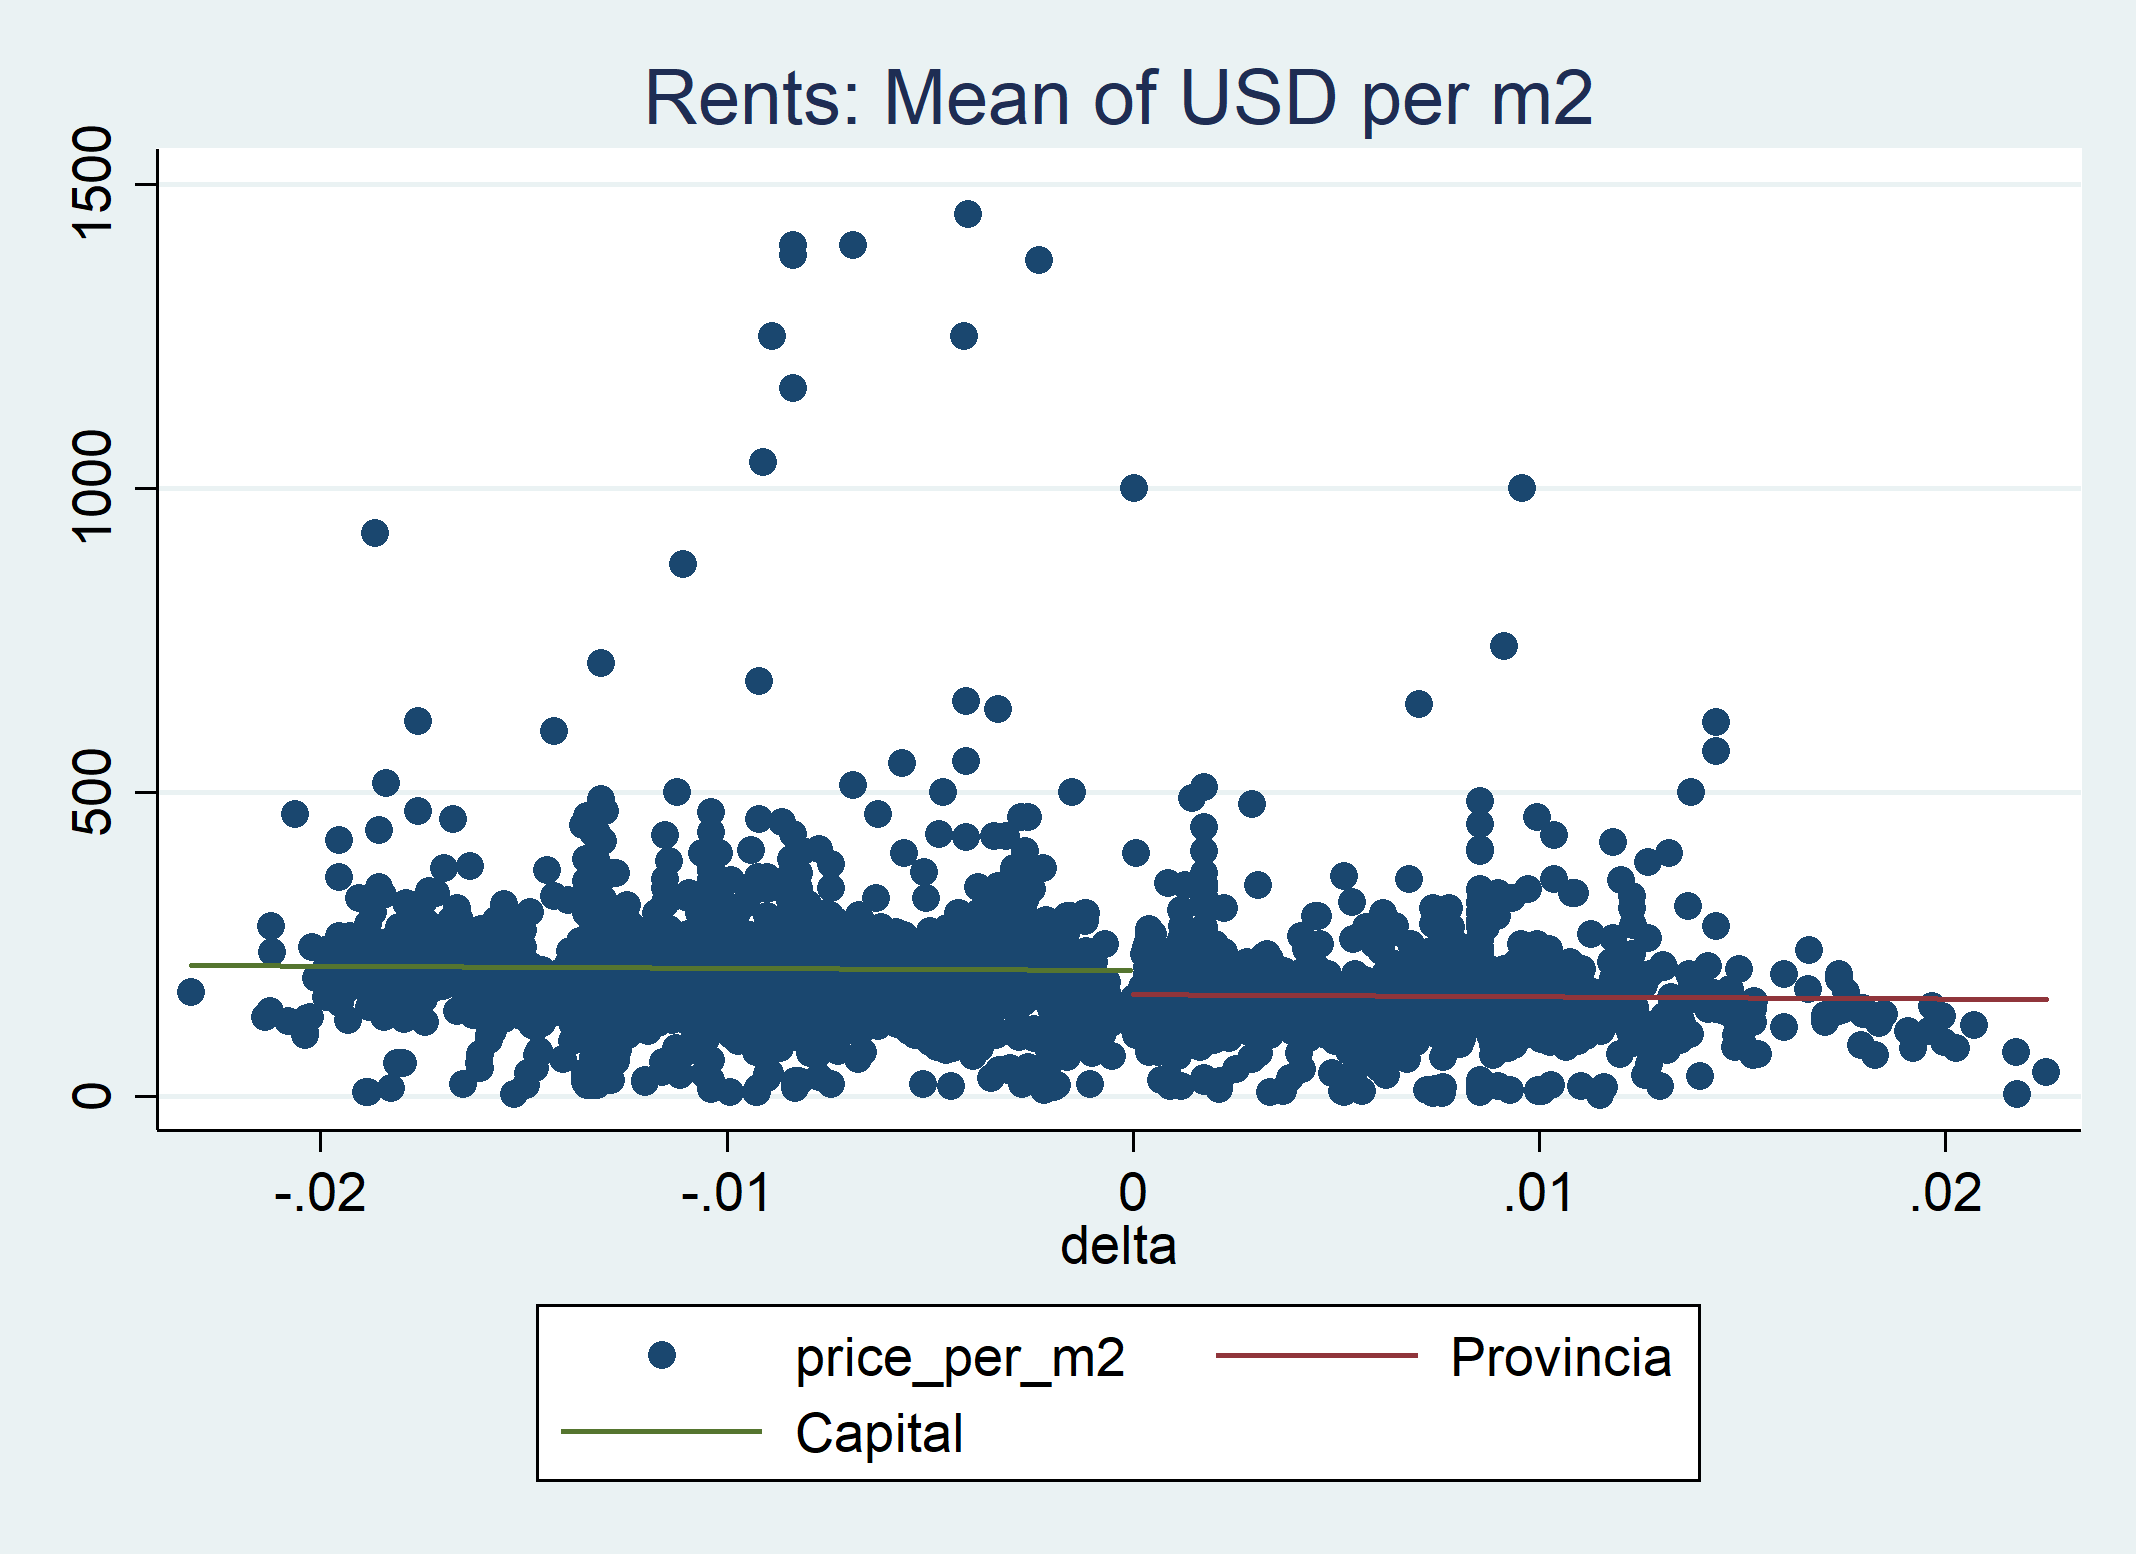

In [12]:
from IPython.display import Image
Image(filename='discont1.png') 

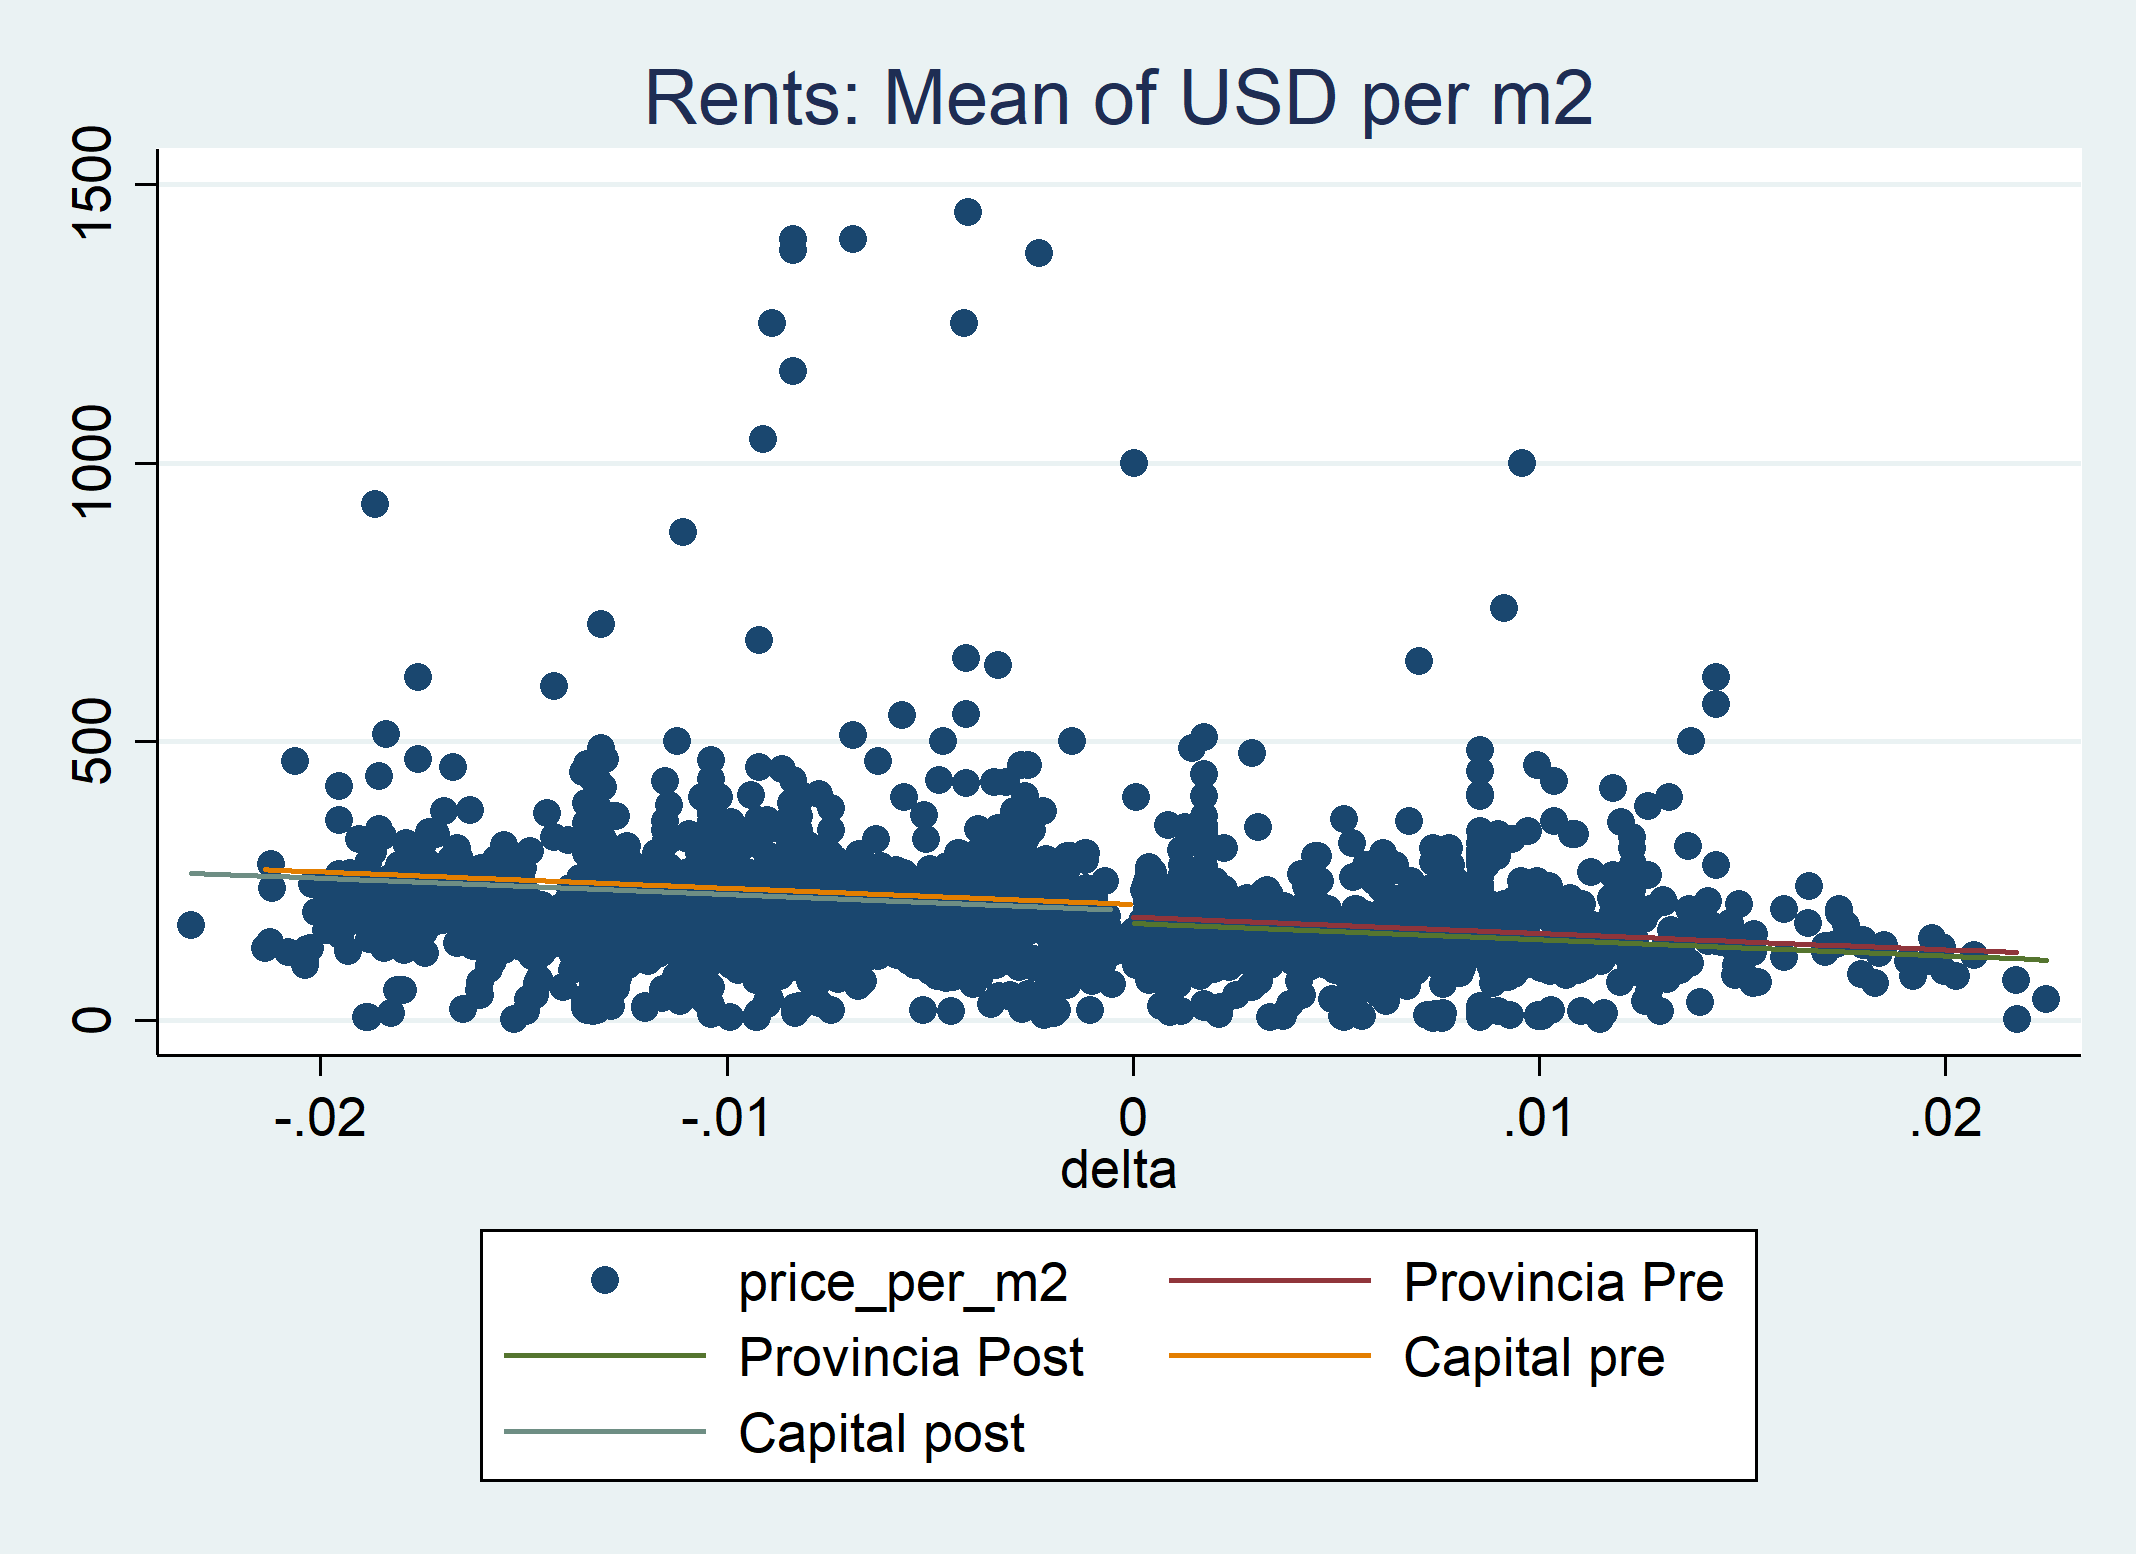

In [6]:
from IPython.display import Image
Image(filename='discont2.png') 

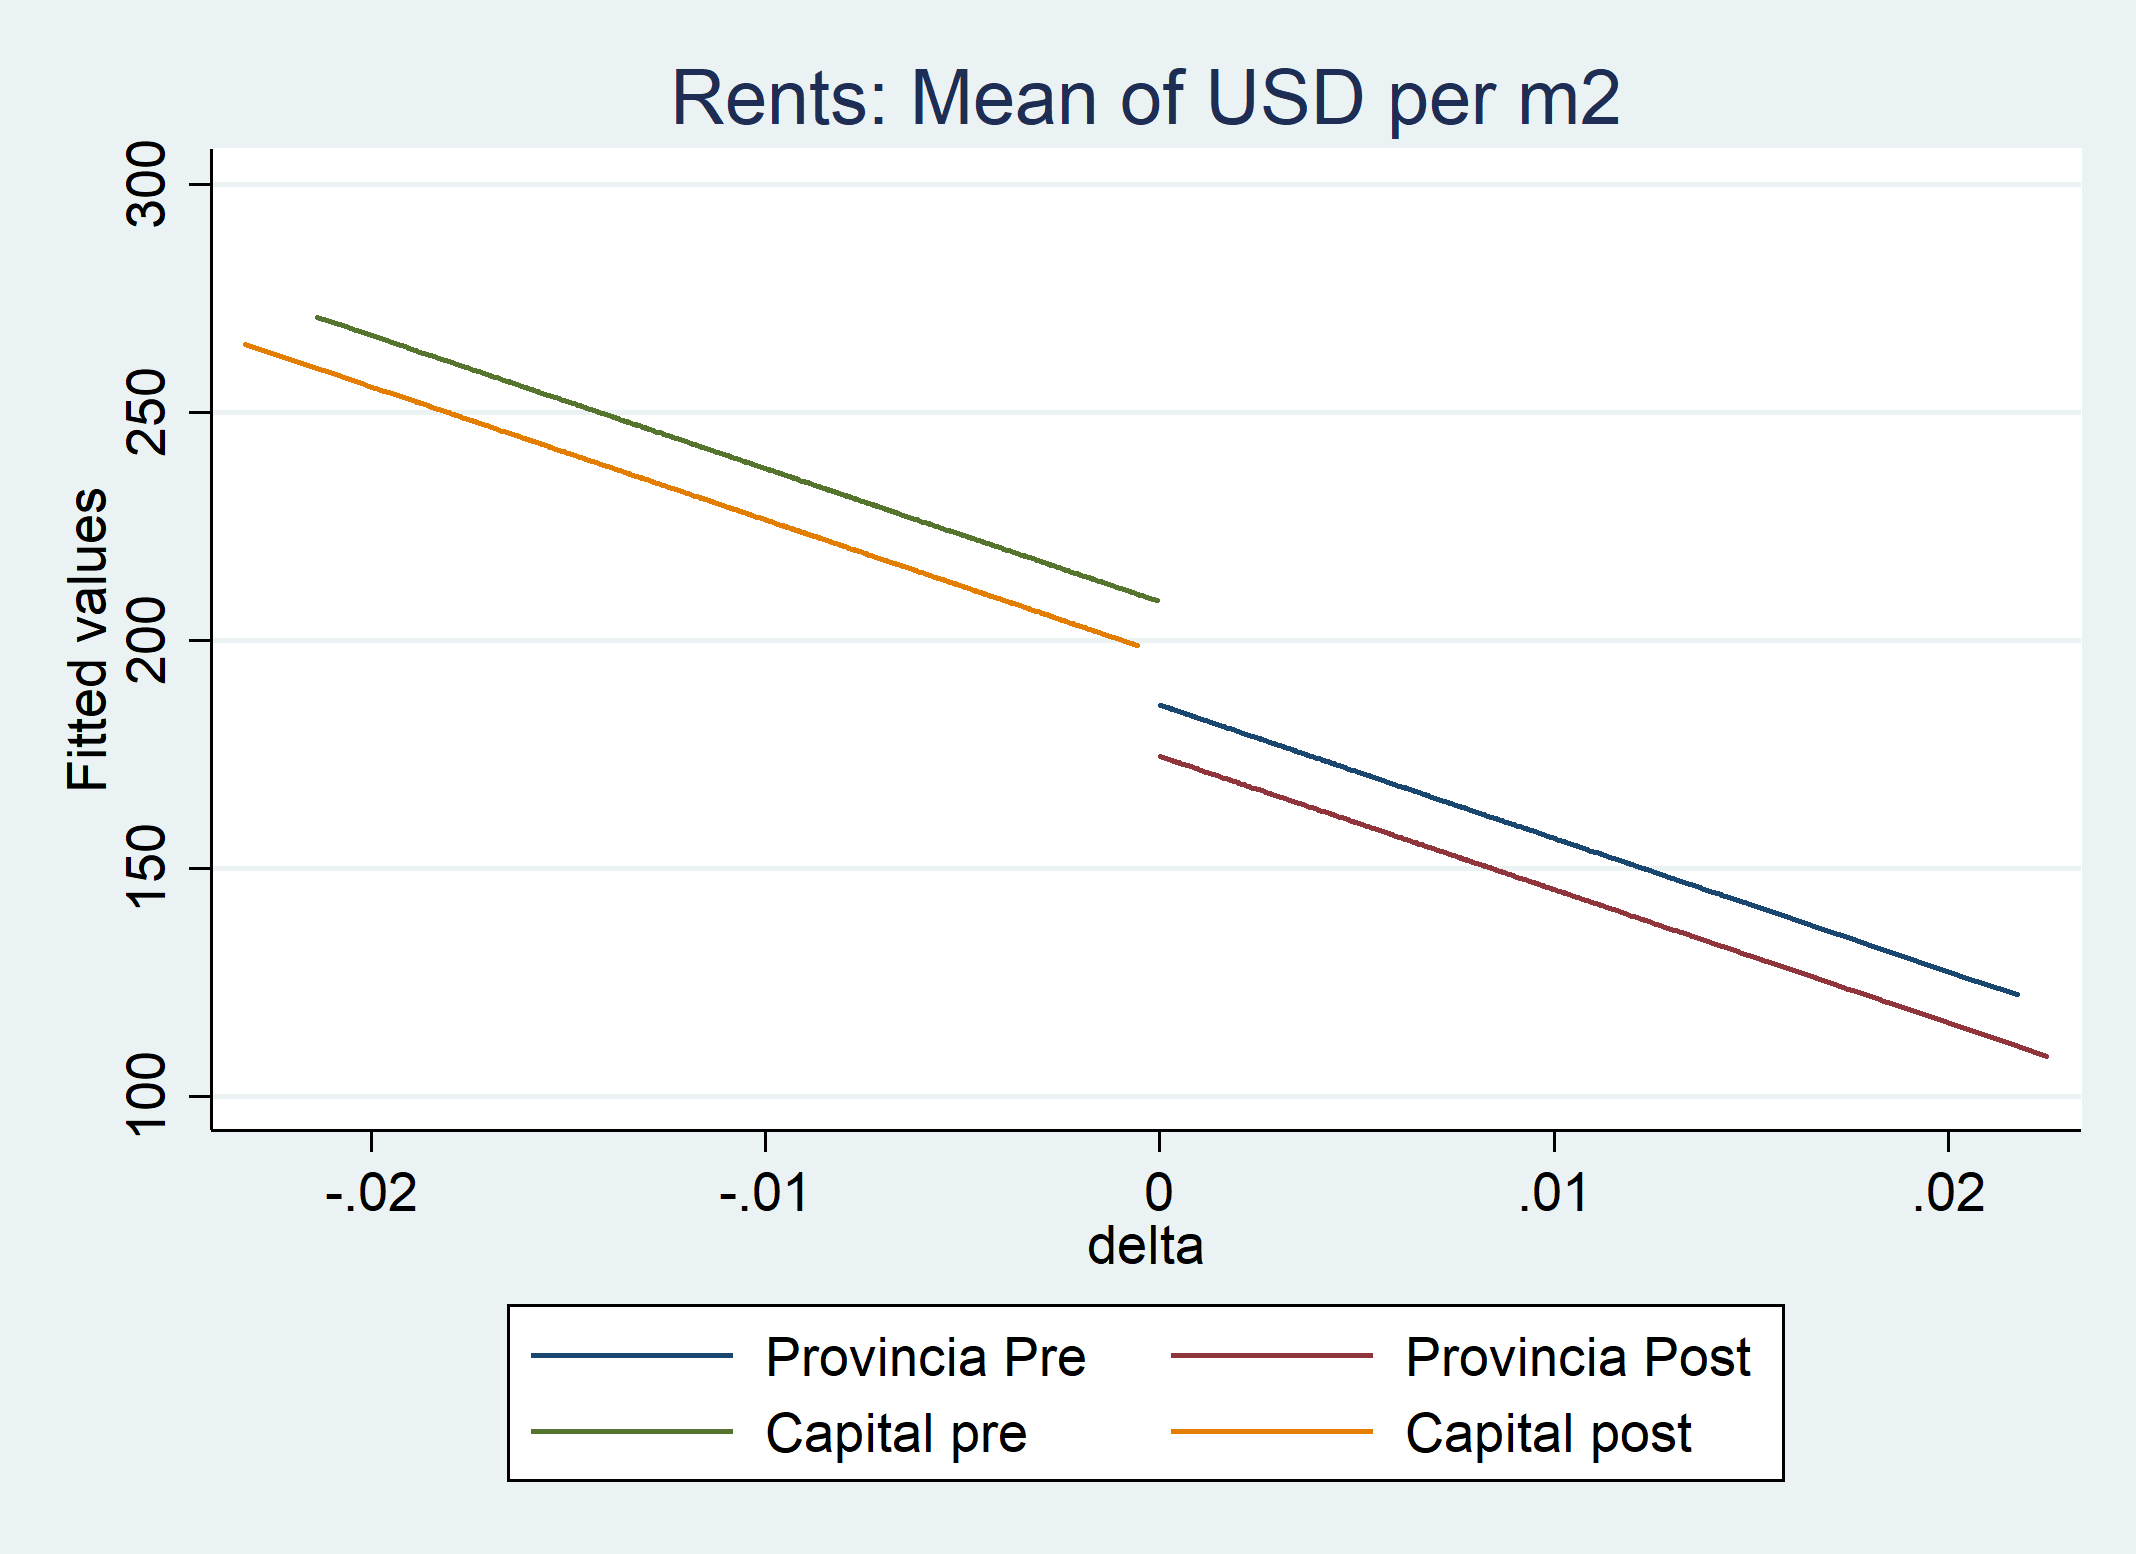

In [13]:
from IPython.display import Image
Image(filename='discont3.png') 

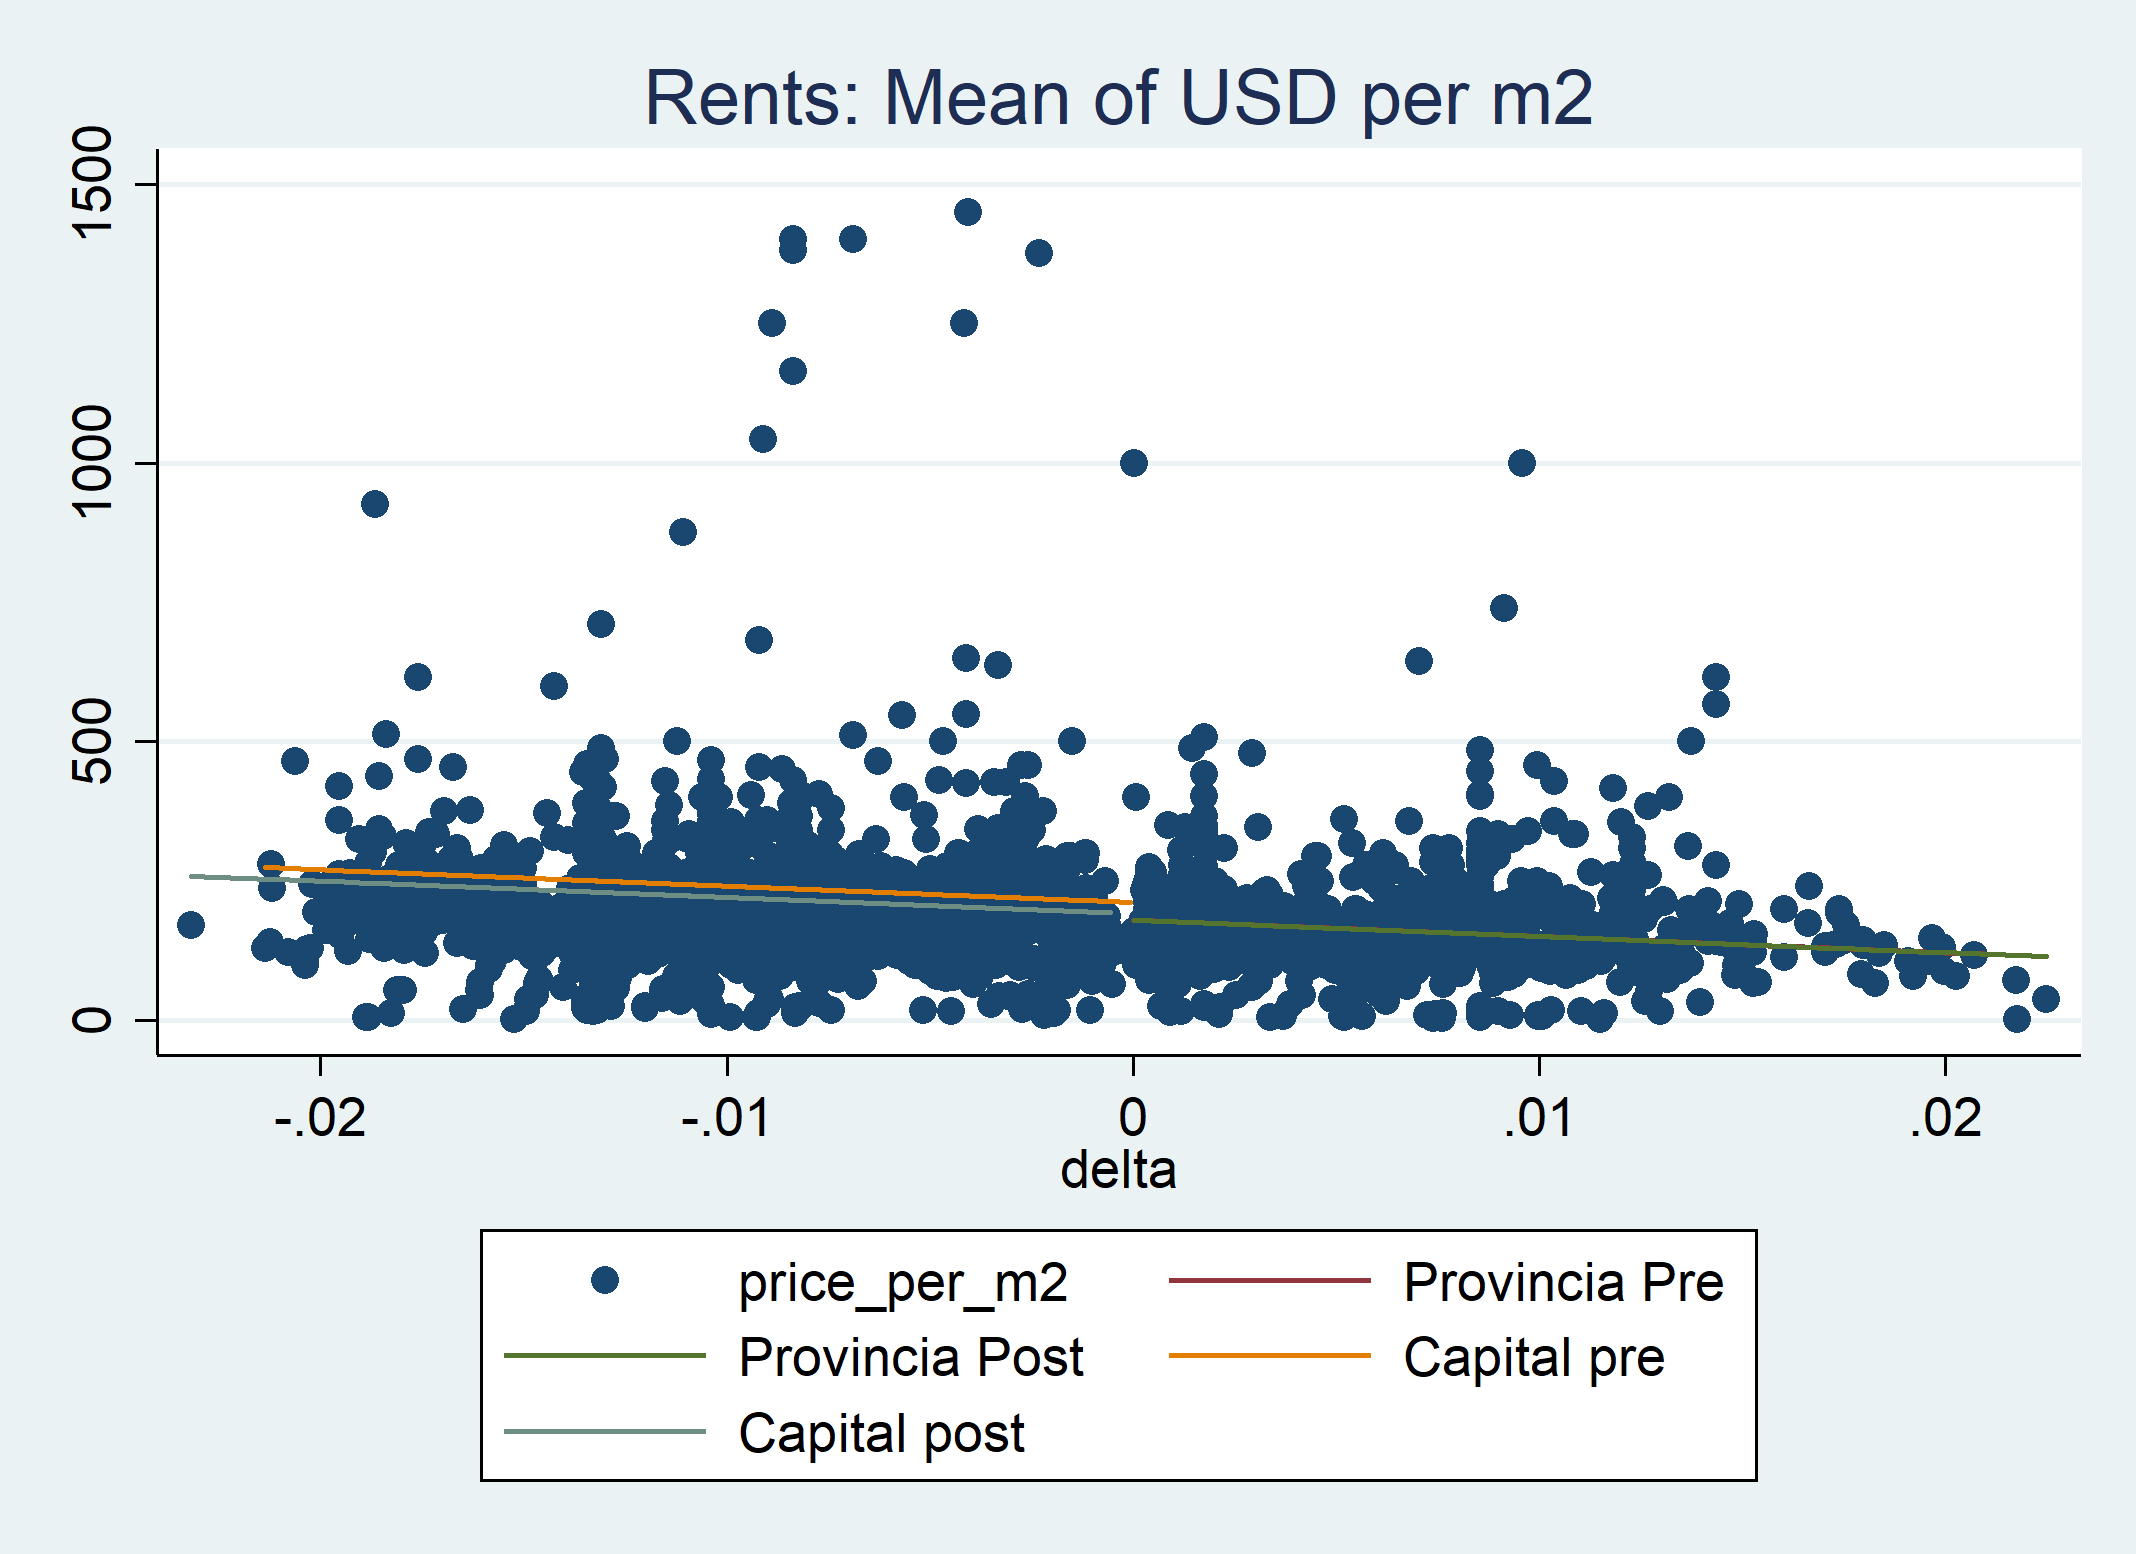

In [9]:
from IPython.display import Image
Image(filename='discont4.png') 